# **Nepal Earthquake Tweet Analysis**

In [ ]:
#Importing libraries for data manipulation and representation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load dataset into a dataframe
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CMP7202-Web Social Media Analytics and Visualisation/Assessment 2/NepalEarthquake.csv", encoding="latin1")

In [ ]:
#Display top 5 rows of dataset
df.head()

ï»¿TweetClass             TweetID  \
0              0  591764470197723137   
1              0  591779538046218240   
2              0  591728244925210624   
3              0  591774433926193152   
4              0  591764472651386882   

                                           TweetText  
0  #Nepal #news Adding to Bhutanese Refugees Bhut...  
1  The massacre of people's movement says peace a...  
2  I'm lonely maybe you're going to die without c...  
3  #nepal #news 6 billion collection collection 1...  
4  #Nepal #news Indian proposal to crash airport ...

In [ ]:
#Display bottom 5 rows of dataset
df.tail()

ï»¿TweetClass             TweetID  \
18228              2  592697535271174145   
18229              2  592697135390416899   
18230              2  592698989507715075   
18231              1    5644654646545646   
18232              2     543533654345435   

                                               TweetText  
18228  #Earthquake in #Nepal #GoldenTemple Temple to ...  
18229  Nepal Earthquake Eerts from AIIMS Safdarjung H...  
18230  UNHCR rushes plastic sheeting and solar-powere...  
18231  Urgent medical need food water needed medicine...  
18232               Available plenty medicine food water

In [ ]:
df.rename(columns={'ï»¿TweetClass': 'TweetClass'}, inplace=True)

In [ ]:
#Type of columns
df.columns

Index(['TweetClass', 'TweetID', 'TweetText'], dtype='object')

In [ ]:
df.shape

(18233, 3)

In [ ]:
#Detailed info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18233 entries, 0 to 18232
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TweetClass  18233 non-null  int64 
 1   TweetID     18233 non-null  int64 
 2   TweetText   18224 non-null  object
dtypes: int64(2), object(1)
memory usage: 427.5+ KB


In [ ]:
#Checking for null values
df.isnull().sum()

TweetClass    0
TweetID       0
TweetText     9
dtype: int64

In [ ]:
df.describe()

TweetClass       TweetID
count  18233.000000  1.823300e+04
mean       0.083749  5.923055e+17
std        0.386754  6.178048e+15
min        0.000000  5.435337e+14
25%        0.000000  5.921631e+17
50%        0.000000  5.925189e+17
75%        0.000000  5.926002e+17
max        2.000000  5.927001e+17

In [ ]:
df['TweetClass'].value_counts()

TweetClass
0    17370
2      664
1      199
Name: count, dtype: int64

**Class Description:**

0 = General Tweets

1 = The tweet mentions a resource that are in needed (Need Tweets)

2 = The tweet mentions a resource that are available (Availability tweets)

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18228    False
18229    False
18230    False
18231    False
18232    False
Length: 18233, dtype: bool

**Observation:** There are no duplicate tweets

In [ ]:
dupli=df.duplicated()
type(dupli)

pandas.core.series.Series

In [ ]:
dupli.value_counts()

False    18233
Name: count, dtype: int64

In [ ]:
new_df=df.drop_duplicates()
new_df.head(5)

TweetClass             TweetID  \
0           0  591764470197723137   
1           0  591779538046218240   
2           0  591728244925210624   
3           0  591774433926193152   
4           0  591764472651386882   

                                           TweetText  
0  #Nepal #news Adding to Bhutanese Refugees Bhut...  
1  The massacre of people's movement says peace a...  
2  I'm lonely maybe you're going to die without c...  
3  #nepal #news 6 billion collection collection 1...  
4  #Nepal #news Indian proposal to crash airport ...

<ipython-input-18-d08a76e5c756>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='TweetClass', data=df, palette=colors)
<ipython-input-18-d08a76e5c756>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['General Tweets', 'Need Tweets', 'Availability Tweets'])


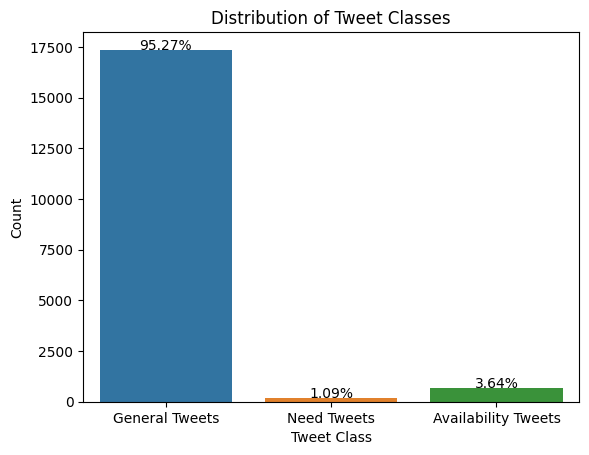

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette for each category
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# Plot the countplot with specified colors
ax = sns.countplot(x='TweetClass', data=df, palette=colors)

# Customize the tick labels on the x-axis
ax.set_xticklabels(['General Tweets', 'Need Tweets', 'Availability Tweets'])

# Add labels and title
plt.xlabel('Tweet Class')
plt.ylabel('Count')
plt.title('Distribution of Tweet Classes')

# Add percentage labels on top of each bar
total = float(len(df))  # total number of observations
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.5,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")

# Show plot
plt.show()


**Observation:** The number of General Tweets are comparitively much higher than number of Need and Help Availability tweets

<ipython-input-19-0f47a2ef5143>:2: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df.TweetClass , color = 'blue' , shade = True , kernel = 'gau' , legend = True)
<ipython-input-19-0f47a2ef5143>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df.TweetClass , color = 'blue' , shade = True , kernel = 'gau' , legend = True)


<Axes: xlabel='TweetClass', ylabel='Density'>

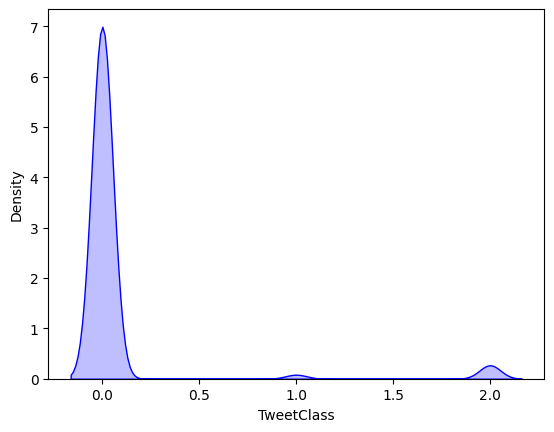

In [ ]:
#kde plot
sns.kdeplot(data = df.TweetClass , color = 'blue' , shade = True , kernel = 'gau' , legend = True)

In [ ]:
#Separating dataframes

general_df=df[df['TweetClass']==0]
need_df=df[df['TweetClass']==1]
available_df=df[df['TweetClass']==2]

print(general_df.shape)
print(need_df.shape)
print(available_df.shape)

(17370, 3)
(199, 3)
(664, 3)


In [ ]:
# A few tweets in the list, Asking for Help
need_df.head()

TweetClass             TweetID  \
17370           1  591922042481479680   
17371           1  591979790627840000   
17372           1  591985311665684480   
17373           1  591989264256106499   
17374           1  591987020924260354   

                                               TweetText  
17370   Nepal seeks mobile medical assistance from India  
17371  Nepalis r w/o water &amp electricity Water is ...  
17372  The wounded and untimely families need to take...  
17373  they are in search of blood donors for the peo...  
17374  Walked all around central &amp old KTM.Shops o...

In [ ]:
# A few tweets in the list, Providing Help
available_df.head()

TweetClass             TweetID  \
17568           2  591915875638325248   
17569           2  591933551798419456   
17570           2  591939270673182721   
17571           2  591968116919410690   
17572           2  591974898139987968   

                                               TweetText  
17568  Indian Prime Minister Narendra Modi has announ...  
17569  Phone from NTC does not take money when you ca...  
17570  India has sent 5 helicopters for relief and re...  
17571  NDRF personnel relief material was sent to Nep...  
17572  #SriLanka to fly emergency medical help food t...

In [ ]:
# A few general tweets
general_df.head()

TweetClass             TweetID  \
0           0  591764470197723137   
1           0  591779538046218240   
2           0  591728244925210624   
3           0  591774433926193152   
4           0  591764472651386882   

                                           TweetText  
0  #Nepal #news Adding to Bhutanese Refugees Bhut...  
1  The massacre of people's movement says peace a...  
2  I'm lonely maybe you're going to die without c...  
3  #nepal #news 6 billion collection collection 1...  
4  #Nepal #news Indian proposal to crash airport ...

In [ ]:
#Transform tweets into Document-Term Matrices (DTMs) separately for three different categories

from sklearn.feature_extraction.text import CountVectorizer

#Transform irrelavant tweets from text to DTM
general_vect = CountVectorizer(stop_words='english')
need_vect       = CountVectorizer(stop_words='english')
available_vect  = CountVectorizer(stop_words='english')

general_dtm  = general_vect.fit_transform(general_df['TweetText'].values.astype('U'))
need_dtm        = need_vect.fit_transform(need_df['TweetText'].values.astype('U'))
available_dtm   = available_vect.fit_transform(available_df['TweetText'].values.astype('U'))

In [ ]:
general_word   = general_vect.get_feature_names_out()
general_freqs  = general_dtm.sum(axis=0).A1
general_result = dict(zip(general_word, general_freqs))

print(len(general_word))

16177


In [ ]:
need_word   = need_vect.get_feature_names_out()
need_freqs  = need_dtm.sum(axis=0).A1
need_result = dict(zip(need_word,need_freqs))

print(len(need_word))

758


In [ ]:
available_word   = available_vect.get_feature_names_out()
available_freqs  = available_dtm.sum(axis=0).A1
available_result = dict(zip(available_word,available_freqs))

print(len(available_word))

1577


In [ ]:
from wordcloud import WordCloud


In [ ]:
#Generating wordcloud of general tweet words
wordcloud=WordCloud(background_color='black',
                   width=1600,
                   height=800).generate_from_frequencies(general_result)
fig=plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
fig.savefig("general_wordcloud.png")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

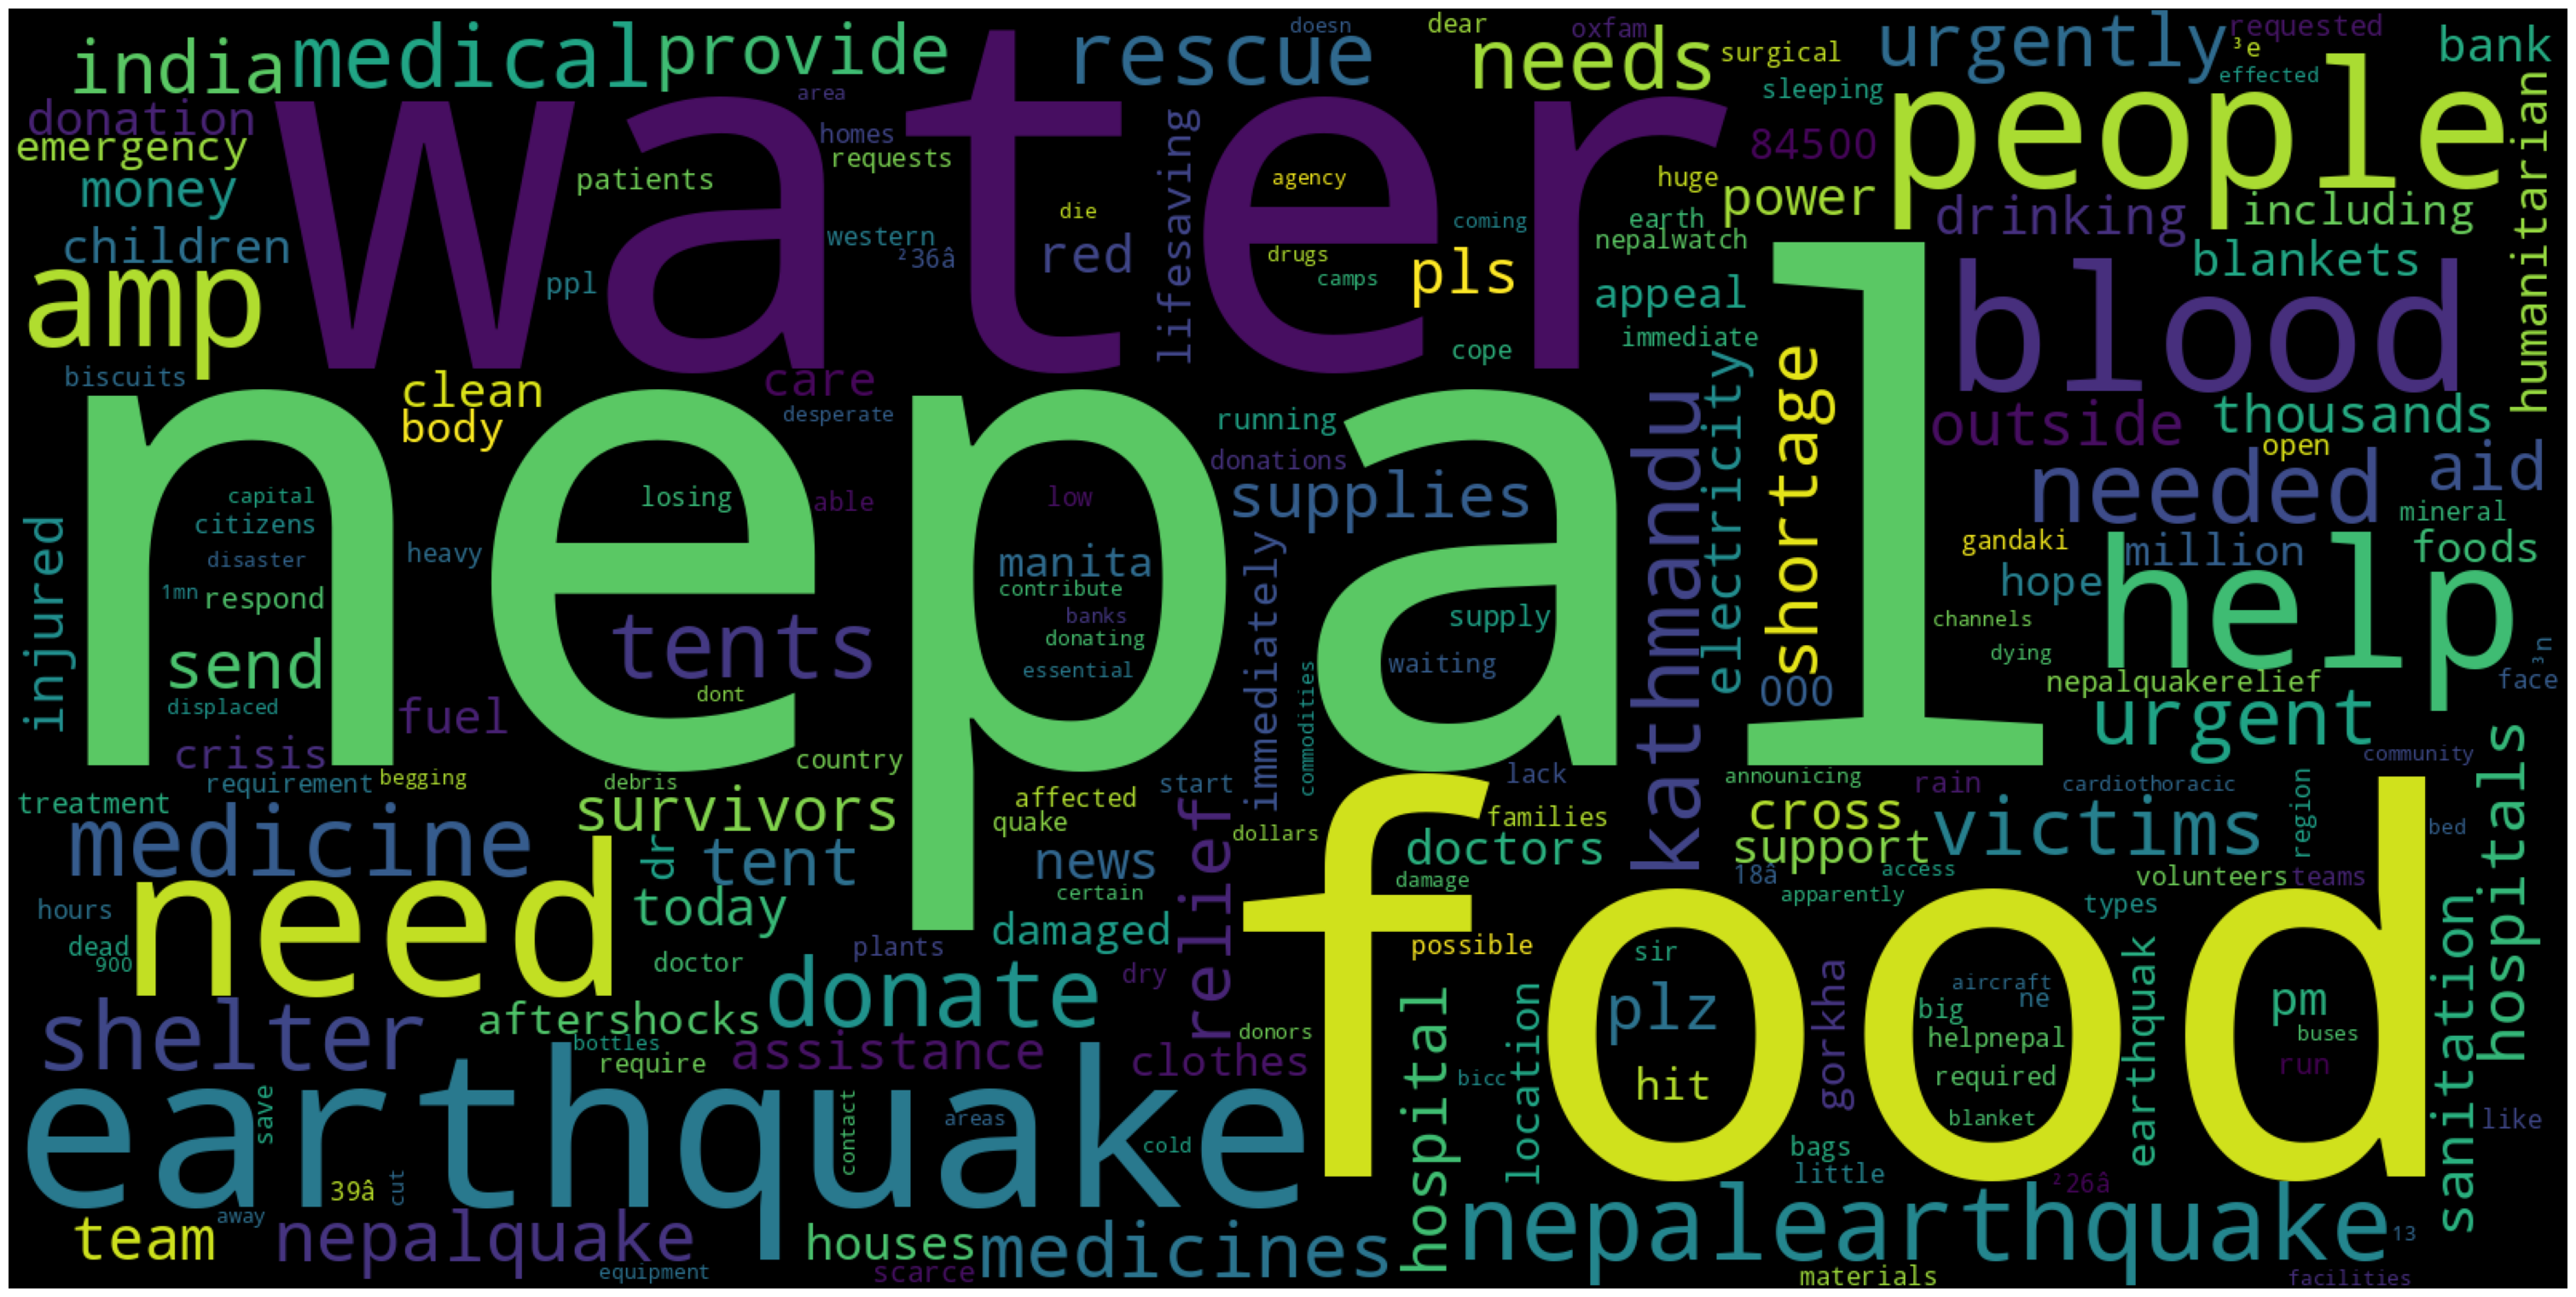

In [ ]:
#Generating wordcloud of NEED tweet words
wordcloud=WordCloud(background_color='black',
                   width=1600,
                   height=800).generate_from_frequencies(need_result)
fig=plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
fig.savefig("need_wordcloud.png")
plt.show()

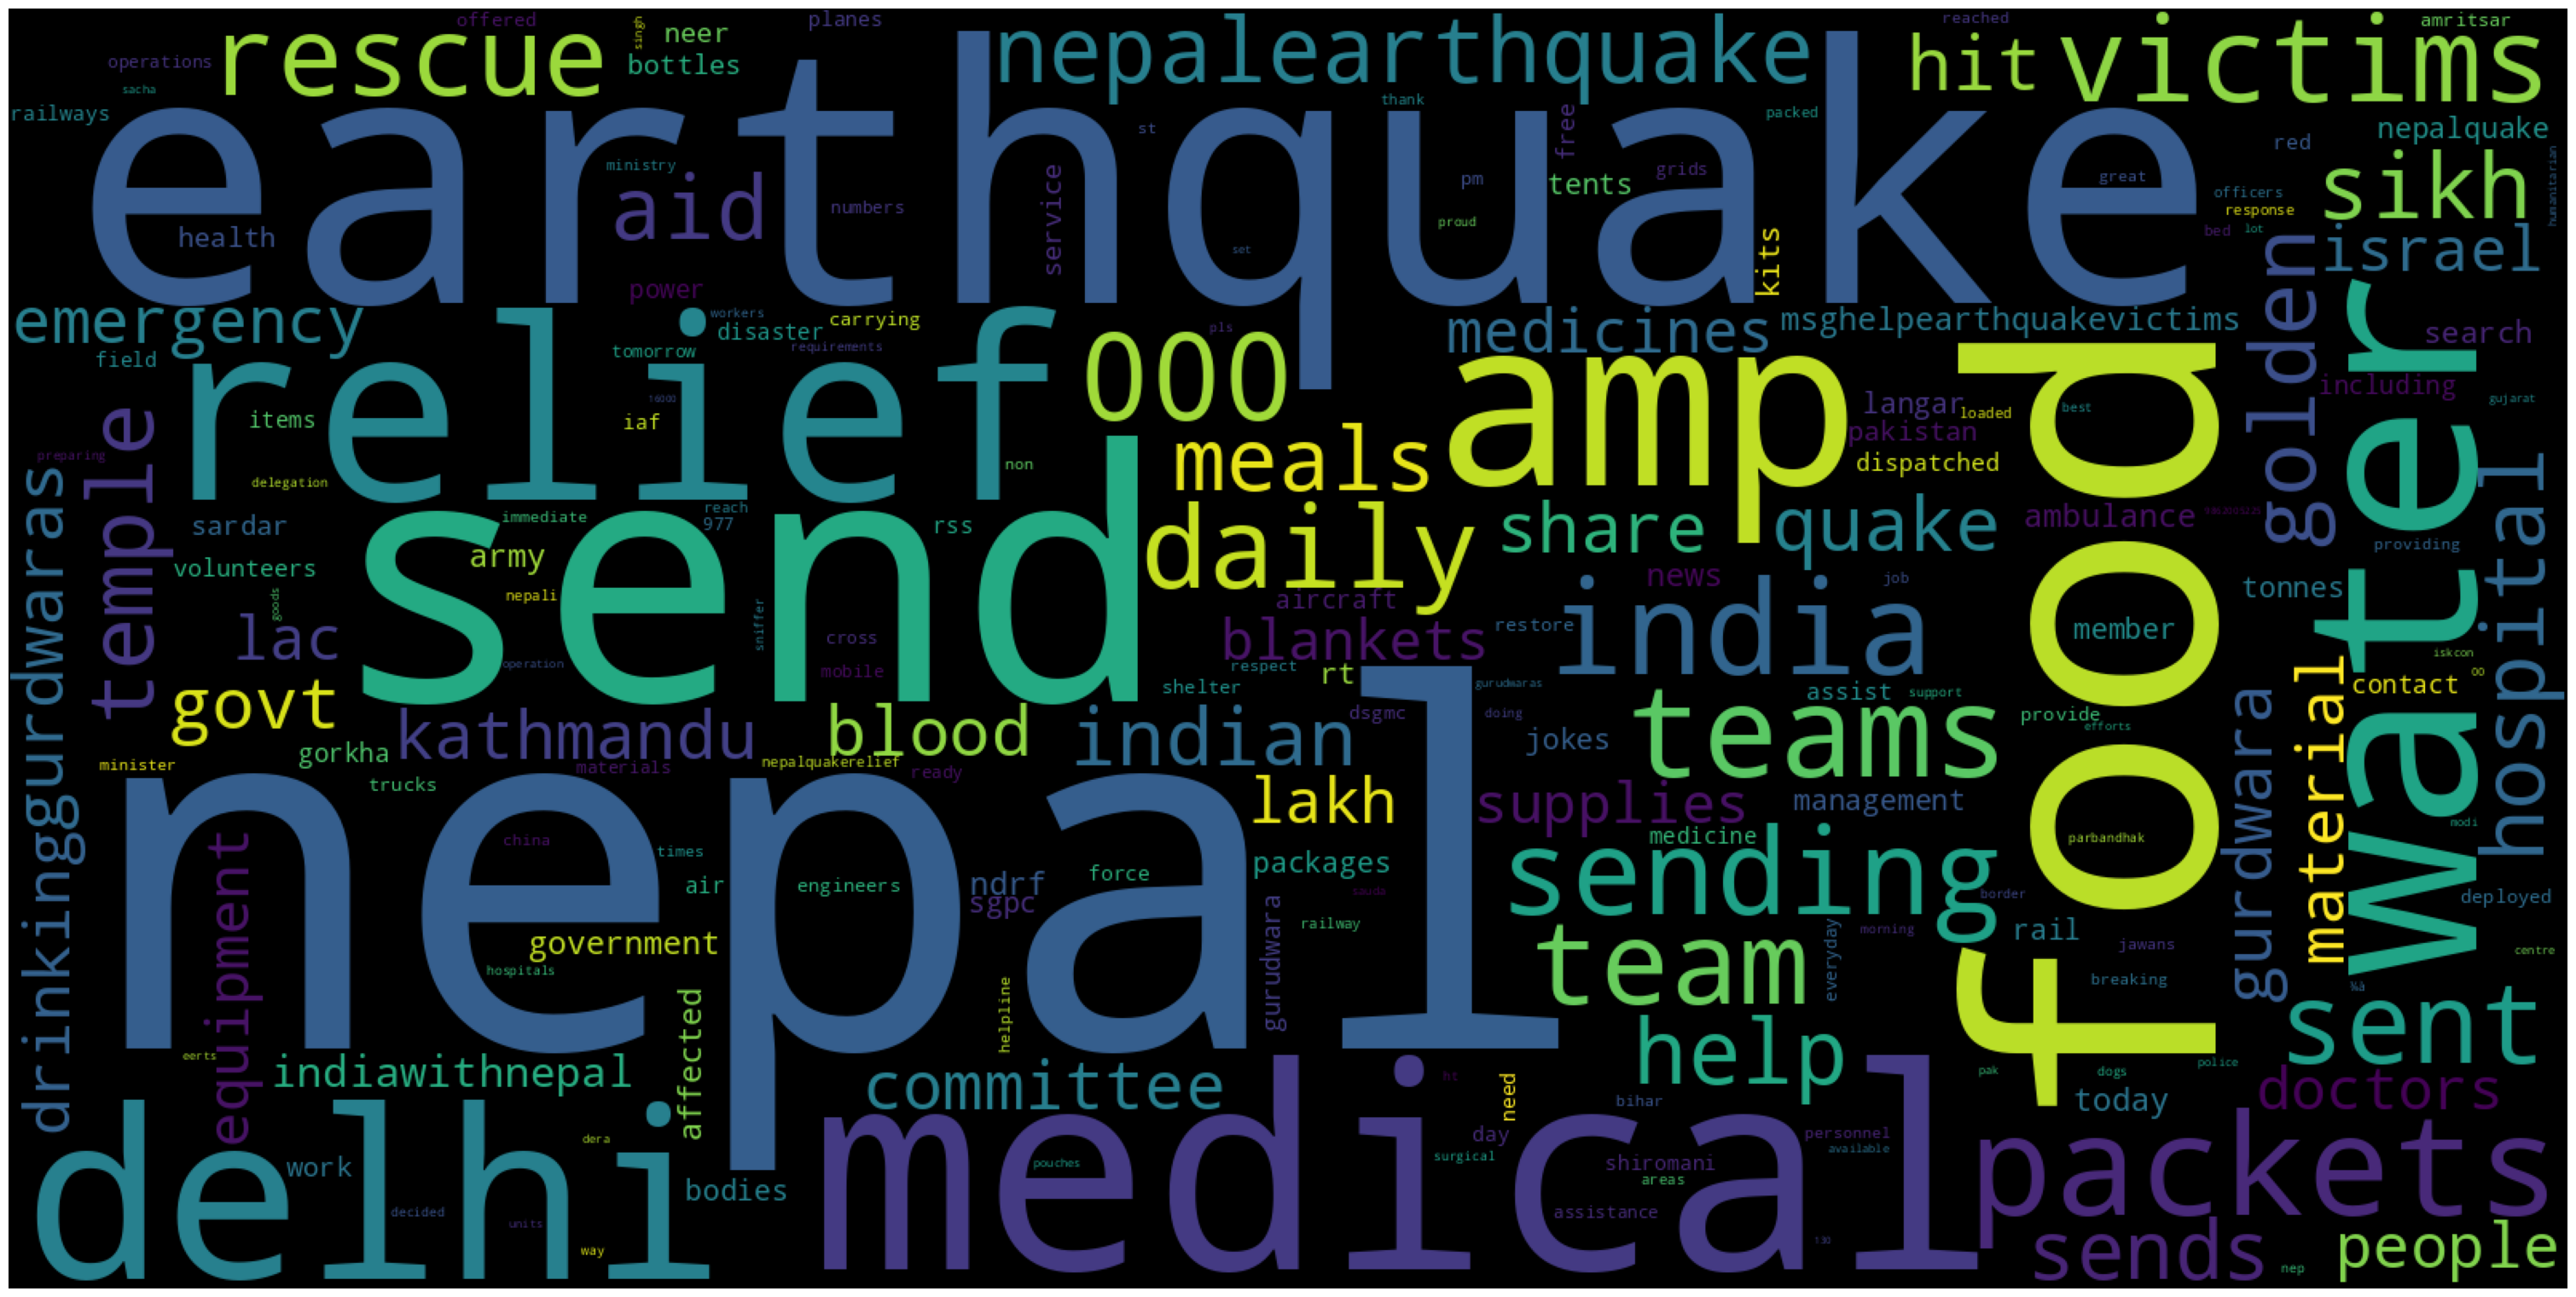

In [ ]:
#Generating wordcloud of 'Help Available' tweet words
wordcloud=WordCloud(background_color='black',
                   width=1600,
                   height=800).generate_from_frequencies(available_result)
fig=plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
fig.savefig("available_wordcloud.png")
plt.show()

## **Data Pre-Processing**

Now let us preprocess text using some NLP tchniques like:

1. converting to lowercase
2. remove text in square brackets,
3. remove links,
4. remove punctuation
5. remove words containing numbers
6. Removing Punctuation
7. Removing stopwords
8. Stemming
9. Lemmatization

In [ ]:
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
punc=string.punctuation
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('punkt')

def clean_text(text):
    if isinstance(text, str):  # Check if text is a string
        text = text.lower()
        text = re.sub('\[.*?\]', '', text)
        text = re.sub('https?://\S+|www\.\S+', '', text)
        text = re.sub('<.*?>+', '', text)
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        text = re.sub('\n', '', text)
        text = re.sub('\w*\d\w*', '', text)

        #Removing stopwords
        text=" ".join([word for word in str(text).split() if word not in stop_words])

        #Stemming
        text = " ".join([stemmer.stem(word) for word in text.split()])

        #Lemmatization
        text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])

    return text


new_df['TweetText'] = new_df['TweetText'].apply(lambda x: clean_text(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def remove_emoji(text):
    if isinstance(text, str):  # Check if text is a string
        emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    else:
        return text


## **Sentiment Analysis**

In [ ]:
new_df.head(5)

TweetClass             TweetID  \
0           0  591764470197723137   
1           0  591779538046218240   
2           0  591728244925210624   
3           0  591774433926193152   
4           0  591764472651386882   

                                           TweetText  
0  nepal news ad bhutanes refuge bhutanes citizen...  
1  massacr peopl movement say peac constitut lost...  
2  im lone mayb your go die without close citi lo...  
3  nepal news billion collect collect one year ha...  
4  nepal news indian propos crash airport crash a...

In [ ]:
def SentimentChecker (newTweets):
    newDF = pd.DataFrame(columns=['text','subjectivity','polarity', 'sentiment'])
    for i in newTweets:
        blob = TextBlob(i) #Create Textblob object of a tweet
        pol = blob.sentiment.polarity
        sub = blob.sentiment.subjectivity

        if pol > 0 : #If polarity of tweets is positive then sent = positive
            sent = "positive"
        elif pol < 0: #If polarity of tweet is negative then sent = negative
            sent = "negative"
        else: #If polarity equals 0 then sent = neutral
            sent = "neutral"

        #Create row for dataframe
        row = [i, sub, pol, sent]
        #Add row to dataframe
        newDF.loc[len(newDF)] = row
    return newDF

In [ ]:
def JointPlotter(newDF):
    # Create jointplot for polarity and subjectivity of twitter tweets
    sns.jointplot(data=newDF, x="subjectivity", y="polarity", hue="sentiment")
    plt.show()

    # Count the occurrences of each sentiment
    sentimentCounts = pd.DataFrame(newDF["sentiment"].value_counts())
    sentimentCounts = sentimentCounts.rename({'sentiment': 'count'}, axis=1)
    sentimentCounts["sentiment"] = sentimentCounts.index

    # Calculate percentages
    sentimentCounts["percentage"] = (sentimentCounts["count"] / sentimentCounts["count"].sum()) * 100

    # Define color palette
    palette = sns.color_palette("Set2", len(sentimentCounts))

    # Create barplot of sentiment counts with percentages
    ax = sns.barplot(data=sentimentCounts, x="sentiment", y="count", palette=palette)

    # Annotate the bars with percentages
    for i, p in enumerate(ax.patches):
        percentage = sentimentCounts.iloc[i]["percentage"]
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

    plt.show()


In [ ]:
def visualiser(subset):
    #Create frequency distribution for "subset"
    fdist = nltk.FreqDist()
    for i in subset["text"]:
        i = nltk.word_tokenize(i)
        for j in i:
            fdist[j] +=1
    fdist.plot(30, cumulative=False)

    #Create word cloud for "subset"
    wordcloud = WordCloud(max_font_size=50, max_words = 100, background_color="black").generate_from_frequencies(fdist)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

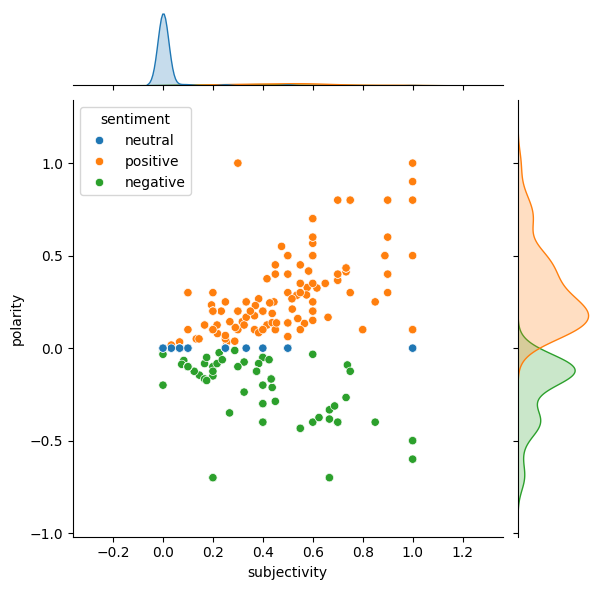

<ipython-input-39-84e92a7df141>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sentimentCounts, x="sentiment", y="count", palette=palette)


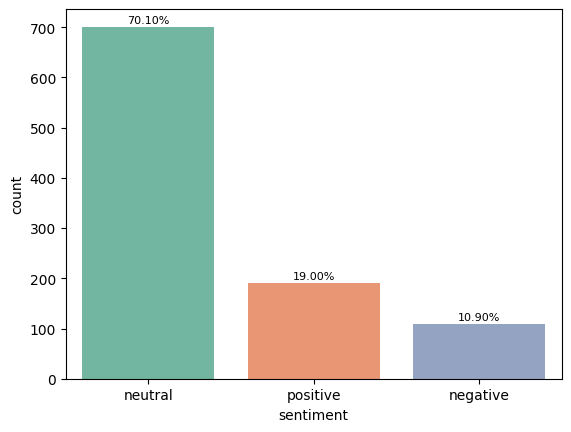

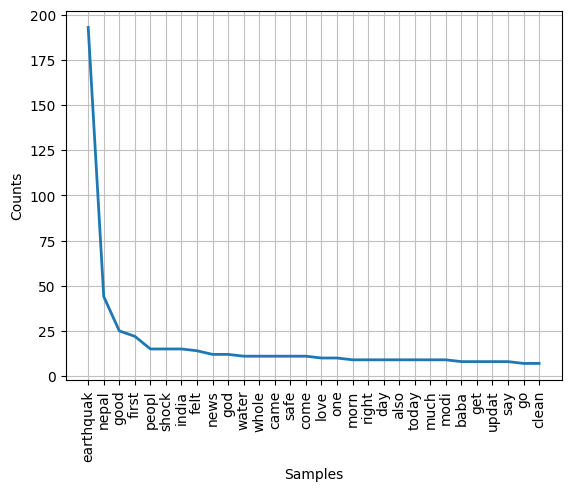

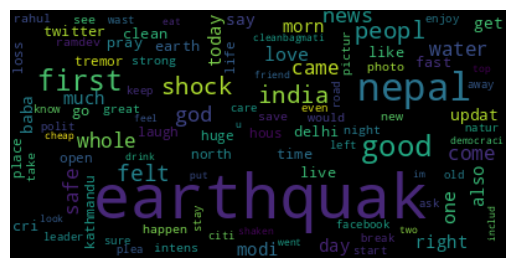

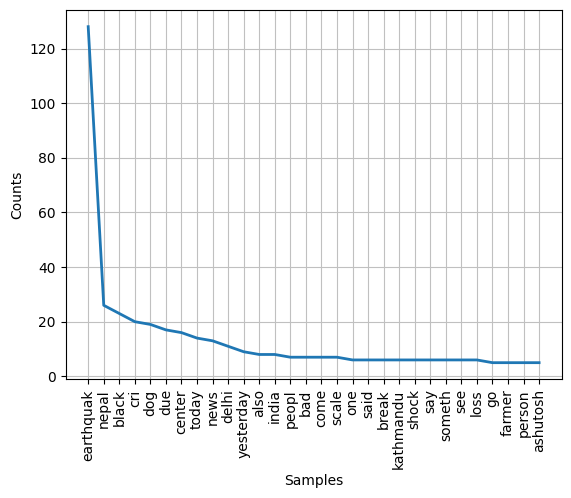

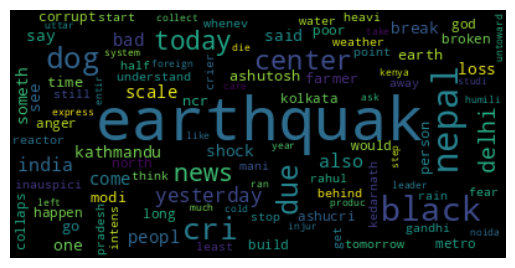

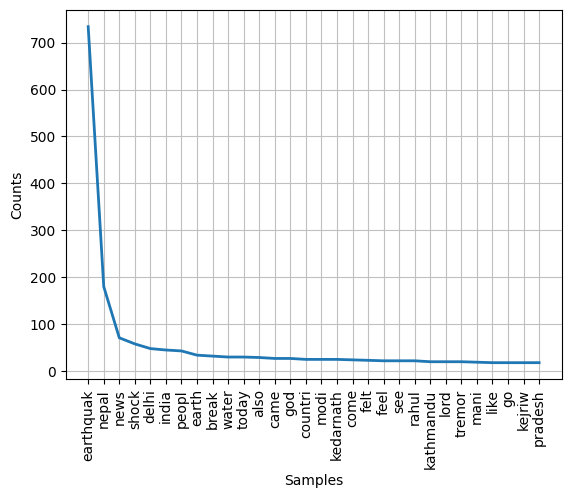

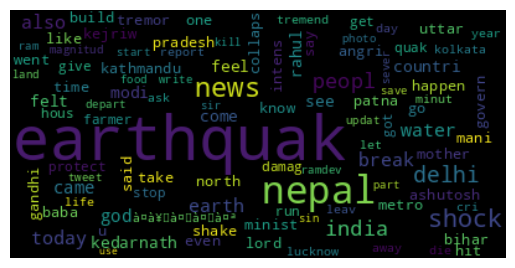

In [ ]:
cleanTweets=new_df['TweetText'].head(1000)
SentimentDF = SentimentChecker(cleanTweets)
JointPlotter(SentimentDF)

#Call visualiser function to plot a wordcloud and a frequency distribution
visualiser(SentimentDF[SentimentDF["sentiment"] == "positive"])
visualiser(SentimentDF[SentimentDF["sentiment"] == "negative"])
visualiser(SentimentDF[SentimentDF["sentiment"] == "neutral"])

##**Machine Learning Models**

In [ ]:
#Splitting the dataset into train and test parts using STRATIFIED SHUFFLE SPLIT technique.

x=new_df['TweetText']
y=new_df['TweetClass']

from sklearn.model_selection import train_test_split

tts=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=6,stratify=y)
x_train,x_test,y_train,y_test=tts

In [ ]:
#Using TfIdfVectoriser to vectorise the dataset.

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_train=TfidfVectorizer(lowercase=True)
dtm_train=vectorizer_train.fit_transform(x_train.values.astype('U'))
dtm_test=vectorizer_train.transform(x_test.values.astype('U'))

##**Classification of Data**

### In the following cells we are applying various the classification algorithms to the dataset.
#### ----Training the model using the training set(dtm_train,y_train)
#### ----Testing the model on the test set(dtm_test)
#### ----Printing the following for each classification algorithm:
##### 1.Accuracy Score
##### 2.Confusion Matrix
##### 3.Classification Report

### **1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
import datetime

regressor = LogisticRegression()
start_time      = datetime.datetime.now()
regressor.fit(dtm_train,y_train)
end_time          = datetime.datetime.now()
LR_training_time = end_time - start_time
print(LR_training_time)

0:00:00.879860


In [ ]:
start_time = datetime.datetime.now()
y_pred_lr  = regressor.predict(dtm_test)
end_time   = datetime.datetime.now()
LR_pred_time = end_time - start_time
print(LR_pred_time)

0:00:00.003328


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [ ]:
score1=accuracy_score(y_test,y_pred_lr)
print(score1)

0.9680073126142597


In [ ]:
print(confusion_matrix(y_test,y_pred_lr))

[[5182    1   28]
 [  47   11    2]
 [  95    2  102]]


In [ ]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5211
           1       0.79      0.18      0.30        60
           2       0.77      0.51      0.62       199

    accuracy                           0.97      5470
   macro avg       0.84      0.56      0.63      5470
weighted avg       0.96      0.97      0.96      5470



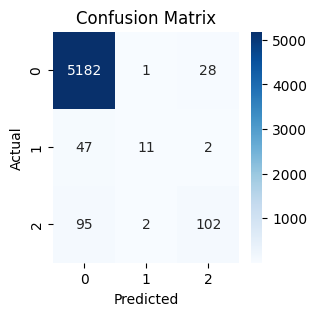

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Convert predictions to binary
#y_pred_binary = np.round(y_pred_lr).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### **2. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn               = KNeighborsClassifier(n_neighbors=3)
start_time        = datetime.datetime.now()
knn.fit(dtm_train,y_train)
end_time          = datetime.datetime.now()
knn_training_time = end_time - start_time
print(knn_training_time)

0:00:00.003208


In [ ]:
start_time = datetime.datetime.now()
y_pred_knn=knn.predict(dtm_test)
end_time = datetime.datetime.now()
knn_pred_time = end_time - start_time
print(knn_pred_time)

0:00:10.088012


In [ ]:
score2=accuracy_score(y_test,y_pred_knn)
print(score2)

0.9634369287020109


In [ ]:
print(confusion_matrix(y_test,y_pred_knn))

[[5168    2   41]
 [  49    8    3]
 [ 103    2   94]]


In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5211
           1       0.67      0.13      0.22        60
           2       0.68      0.47      0.56       199

    accuracy                           0.96      5470
   macro avg       0.77      0.53      0.59      5470
weighted avg       0.96      0.96      0.96      5470



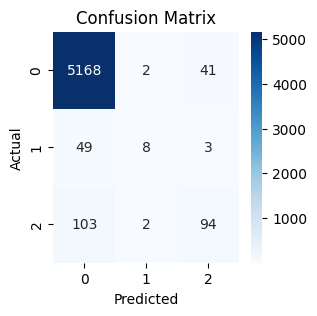

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Convert predictions to binary
y_pred_binary = np.round(y_pred_knn).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### **3. Multinomial Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model1 = MultinomialNB()
start_time = datetime.datetime.now()
model1.fit(dtm_train, y_train)
end_time = datetime.datetime.now()
nb_training_time = end_time - start_time
print(nb_training_time)

0:00:00.007220


In [ ]:
start_time = datetime.datetime.now()
y_pred_nvm= model1.predict(dtm_test)
end_time = datetime.datetime.now()
nb_pred_time = end_time - start_time
print(nb_pred_time)

0:00:00.001610


In [ ]:
score3=accuracy_score(y_test , y_pred_nvm)
print(score3)

0.9550274223034735


In [ ]:
print(confusion_matrix(y_test,y_pred_nvm))

[[5208    0    3]
 [  60    0    0]
 [ 183    0   16]]


In [ ]:
print(classification_report(y_test,y_pred_nvm))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5211
           1       0.00      0.00      0.00        60
           2       0.84      0.08      0.15       199

    accuracy                           0.96      5470
   macro avg       0.60      0.36      0.37      5470
weighted avg       0.94      0.96      0.94      5470



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


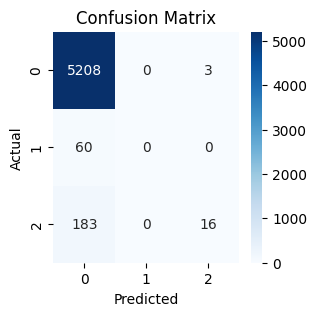

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Convert predictions to binary
y_pred_binary = np.round(y_pred_nvm).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nvm)

# Plot confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### **4. Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
model1=SVC(kernel='linear')
start_time = datetime.datetime.now()
model1.fit(dtm_train,y_train)
end_time = datetime.datetime.now()
svc_training_time = end_time - start_time
print( svc_training_time)

0:00:02.272443


In [ ]:
start_time = datetime.datetime.now()
y_pred_svc=model1.predict(dtm_test)
end_time = datetime.datetime.now()
svc_pred_time = end_time - start_time
print( svc_pred_time)

0:00:00.749952


In [ ]:
score4=accuracy_score(y_test,y_pred_svc)
print(score4)

0.9685557586837295


In [ ]:
print(confusion_matrix(y_test,y_pred_svc))

[[5172    0   39]
 [  44   14    2]
 [  84    3  112]]


In [ ]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5211
           1       0.82      0.23      0.36        60
           2       0.73      0.56      0.64       199

    accuracy                           0.97      5470
   macro avg       0.84      0.60      0.66      5470
weighted avg       0.97      0.97      0.96      5470



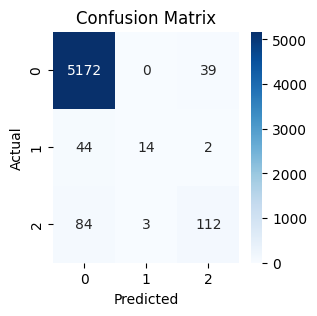

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Convert predictions to binary
y_pred_binary = np.round(y_pred_svc).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svc)

# Plot confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## **5. Tensor Flow model**

#### Preparing the input features for training
- We converting the text words into arrays form.
- Maximum 500 features/words selected for training. These 500 words will be selected on the importance that will distinguish between the positive tweets and negative tweets.

In [ ]:
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Activation, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

# Data Preparation (Assuming 'new_df' is your dataframe)
X = new_df.TweetText
y = new_df.TweetClass

# Encoding labels if necessary
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Filter out non-textual elements (assuming X is a pandas Series)
X_text = X.apply(lambda x: str(x) if isinstance(x, str) else '')  # Convert non-string elements to empty strings

# Tokenization and Padding
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X_text)
sequences = tok.texts_to_sequences(X_text)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

# Define TensorFlow-based model
def tensorflow_based_model():
    max_len = 500  # Define max_len
    inputs = Input(name='inputs', shape=[max_len])
    layer = Embedding(2000, 50, input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256, name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1, name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

# Compile model
model = tensorflow_based_model()
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

# Training
start_time = datetime.datetime.now()
history = model.fit(X_train, y_train, batch_size=80, epochs=6, validation_split=0.1)
end_time = datetime.datetime.now()
training_time = end_time - start_time
print("Training Time:", training_time)

# Evaluation
start_time = datetime.datetime.now()
accr = model.evaluate(X_test, y_test)  # Evaluating model on test data
end_time = datetime.datetime.now()
prediction_time = end_time - start_time
print("Prediction Time:", prediction_time)

# Print accuracy
print('Test set\n  Accuracy: {:0.2f}'.format(accr[1]))

# Predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)


Epoch 1/6
144/144 [==============================] - 70s 465ms/step - loss: 0.2116 - accuracy: 0.9461 - val_loss: 0.0776 - val_accuracy: 0.9099
Epoch 2/6
144/144 [==============================] - 66s 457ms/step - loss: -0.4316 - accuracy: 0.9321 - val_loss: -1.0068 - val_accuracy: 0.9554
Epoch 3/6
144/144 [==============================] - 67s 465ms/step - loss: -2.7762 - accuracy: 0.9403 - val_loss: -3.0694 - val_accuracy: 0.9499
Epoch 4/6
144/144 [==============================] - 67s 466ms/step - loss: 1.9696 - accuracy: 0.9236 - val_loss: 494.9549 - val_accuracy: 0.0094
Epoch 5/6
144/144 [==============================] - 65s 450ms/step - loss: 146.0975 - accuracy: 0.5248 - val_loss: -3.2176 - val_accuracy: 0.9514
Epoch 6/6
144/144 [==============================] - 66s 458ms/step - loss: -8.2156 - accuracy: 0.9434 - val_loss: -7.0293 - val_accuracy: 0.9522
Training Time: 0:07:24.394594
171/171 [==============================] - 14s 83ms/step - loss: -11.3177 - accuracy: 0.9386
Pr

In [ ]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are your true labels and predicted labels respectively
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5200
           1       0.05      0.25      0.08        51
           2       0.00      0.00      0.00       219

    accuracy                           0.94      5470
   macro avg       0.34      0.41      0.36      5470
weighted avg       0.94      0.94      0.94      5470



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


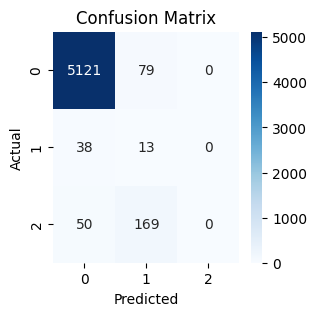

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Convert predictions to binary
y_pred_binary = np.round(y_pred).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## **Conclusion**

In this project total of 5 Algorithms have been Implemented optimized and analysed
We are using several Metrics to evaluate the algorithms.
The metrics are as follows:

Accuracy

Time to train the Model

Time To Predict

Accuracy-Time Ratio( Train)

Accuracy-Time Ratio( Test)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data
Accuracy = [score1, score2, score3, score4, accr[1]]  # Include accuracy of TensorFlow model
Train_time = [LR_training_time, knn_training_time, nb_training_time, svc_training_time, training_time]  # No training time for TensorFlow
pred_test_time = [LR_pred_time, knn_pred_time, nb_pred_time, svc_pred_time, prediction_time]  # No prediction time for TensorFlow

data = {
    'Accuracy': Accuracy,
    'Train_Time': Train_time,
    'Prediction': pred_test_time,
    'Algorithm': ['Logistic Regression', 'KNN', "Naive Bayes", 'SVM linear', 'LSTM Neural Network']
}

df = pd.DataFrame(data)

<ipython-input-89-859fafb1b68d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df.Accuracy, y=df.Algorithm, palette=palette)


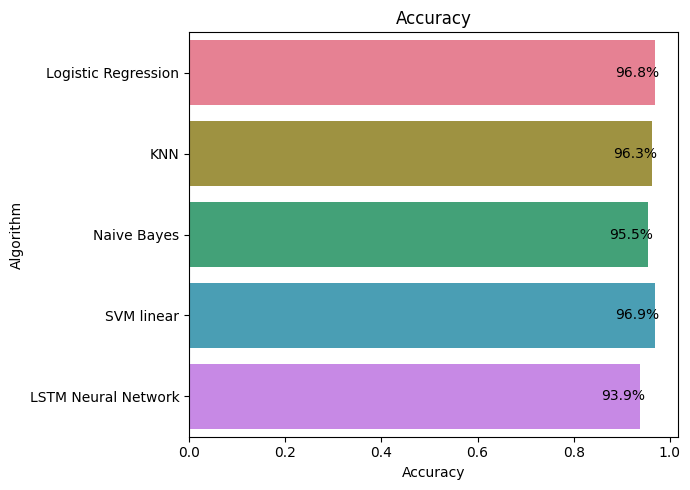

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing Algorithm and Accuracy columns

# Set color palette
palette = sns.color_palette("husl", len(df))

# Plotting Accuracy
plt.figure(figsize=(7, 5))
ax = sns.barplot(x=df.Accuracy, y=df.Algorithm, palette=palette)

# Add percentage labels
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width())
    x = p.get_x() + p.get_width() + 0.01
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='right', va='center') #top', 'bottom', 'center', 'baseline', 'center_baseline'


plt.title('Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.tight_layout()
plt.show()


<ipython-input-90-0fc74debf9bc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.Train_Time, y=df.Algorithm, palette=palette)


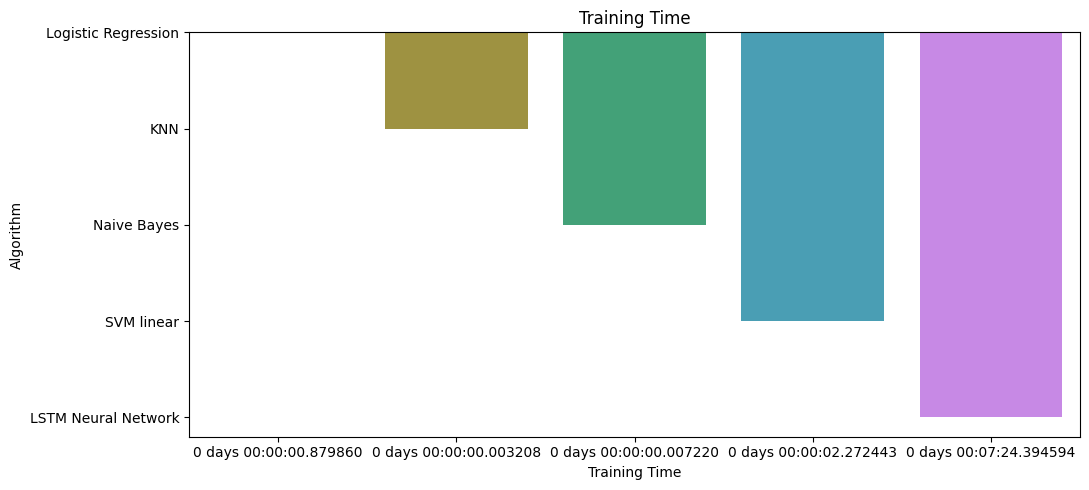

In [ ]:

# Plotting Training Time
plt.figure(figsize=(11, 5))
sns.barplot(x=df.Train_Time, y=df.Algorithm, palette=palette)
plt.title('Training Time')
plt.xlabel('Training Time')
plt.ylabel('Algorithm')
plt.tight_layout()
plt.show()


<ipython-input-91-5f1c41bce117>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.Prediction, y=df.Algorithm, palette=palette)


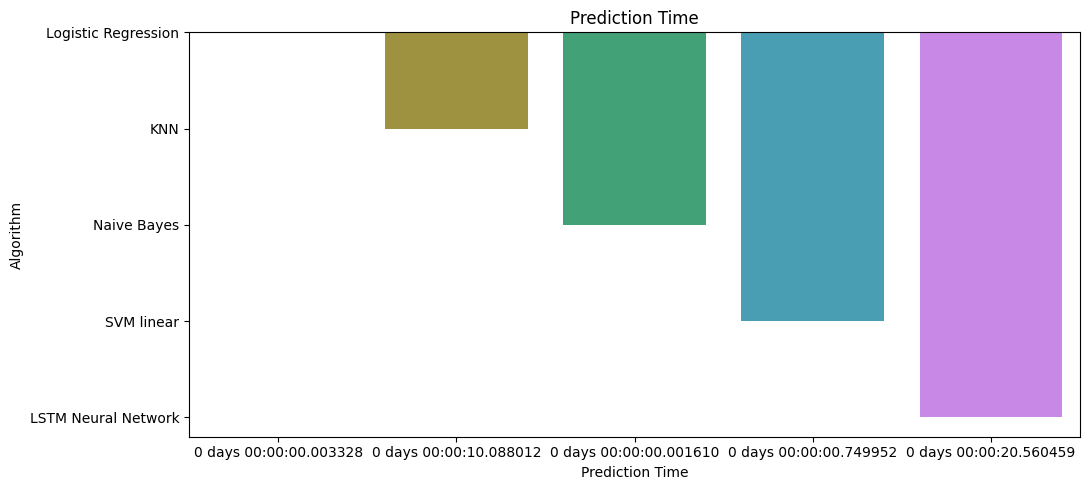

In [ ]:

# Plotting Prediction Time
plt.figure(figsize=(11, 5))
sns.barplot(x=df.Prediction, y=df.Algorithm, palette=palette)
plt.title('Prediction Time')
plt.xlabel('Prediction Time')
plt.ylabel('Algorithm')
plt.tight_layout()
plt.show()